In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
#from pyAgrum.lib.pretty_print import pretty_cpt

from IPython.display import display, Math, Latex

# Exercice 2

On lance 2 dés (équilibrés). Déterminer, grâce à un réseau bayésien la loi de probabilité du maximum des chiffres indiqués par les 2 dés.

PS- on peut représenter des dépendances fonctionnelles entre variables par des CPTs ne contenant que des probabilités $0$ ou $1$

In [2]:
bn=gum.BayesNet()

d1=bn.add(gum.RangeVariable("D1","Dé 1",1,6))
d2=bn.add(gum.RangeVariable("D2","Dé 2",1,6))

In [3]:
m=bn.addMAX(gum.RangeVariable("M","Max(D1,D2)",1,6))

In [4]:
bn.addArc(d1,m)
bn.addArc(d2,m)

bn.cpt(d1).fillWith([1]*6).normalize()
bn.cpt(d2).fillWith([1]*6).normalize()

(gum::Potential<double>@0x368a2b0) <D2:1> :: 0.166667 /<D2:2> :: 0.166667 /<D2:3> :: 0.166667 /<D2:4> :: 0.166667 /<D2:5> :: 0.166667 /<D2:6> :: 0.166667

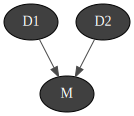

In [5]:
gnb.showBN(bn)

In [6]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.posterior(m)

(gum::Potential<double>@0x2d40c10) <M:1> :: 0.0277778 /<M:2> :: 0.0833333 /<M:3> :: 0.138889 /<M:4> :: 0.194444 /<M:5> :: 0.25 /<M:6> :: 0.305556

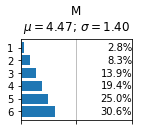

(gum::Potential<double>@0x377fed0) <M:1> :: 0.0277778 /<M:2> :: 0.0833333 /<M:3> :: 0.138889 /<M:4> :: 0.194444 /<M:5> :: 0.25 /<M:6> :: 0.305556

In [7]:
#histogramme
gnb.showPosterior(bn,target='M',evs={})
# liste
# print(gum.getPosterior(bn,target='M',evs={}).tolist())
# potentiel
gum.getPosterior(bn,target='M',evs={})

Vérifier la distribution de la loi de probabilité de ce même maximum lorsque l'on apprend que l'une valeur paire a été tirée sur l'un des dés.

In [8]:
ie.setEvidence({'D1': [0,1,0,1,0,1]}) 
ie.makeInference()
ie.posterior(m)

(gum::Potential<double>@0x38e4570) <M:1> :: 0 /<M:2> :: 0.111111 /<M:3> :: 0.0555556 /<M:4> :: 0.277778 /<M:5> :: 0.111111 /<M:6> :: 0.444444